# Tratamiento de datos
<hr>

In [1]:
import pandas as pd
import numpy as np

In [2]:
classification_data = pd.read_csv("B3DB_classification.tsv",
                                  sep="\t")

In [3]:
classification_data.columns

Index(['NO.', 'compound_name', 'IUPAC_name', 'SMILES', 'CID', 'logBB',
       'BBB+/BBB-', 'Inchi', 'threshold', 'reference', 'group', 'comments'],
      dtype='object')

In [4]:
classification_data.head()

,NO.,compound_name,IUPAC_name,SMILES,CID,logBB,BBB+/BBB-,Inchi,threshold,reference,group,comments
0,1,sulphasalazine,2-hydroxy-5-[[4-(pyridin-2-ylsulfamoyl)phenyl]...,O=C(O)c1cc(N=Nc2ccc(S(=O)(=O)Nc3ccccn3)cc2)ccc1O,5339.0,-2.69,BBB-,InChI=1S/C18H14N4O5S/c23-16-9-6-13(11-15(16)18...,NaN,R2|R2|R25|R46|,A,NaN
1,2,moxalactam,7-[[2-carboxy-2-(4-hydroxyphenyl)acetyl]amino]...,COC1(NC(=O)C(C(=O)O)c2ccc(O)cc2)C(=O)N2C(C(=O)...,3889.0,-2.52,BBB-,InChI=1S/C20H20N6O9S/c1-25-19(22-23-24-25)36-8...,NaN,R25|,A,NaN
2,3,clioquinol,5-chloro-7-iodoquinolin-8-ol,Oc1c(I)cc(Cl)c2cccnc12,2788.0,-2.40,BBB-,InChI=1S/C9H5ClINO/c10-6-4-7(11)9(13)8-5(6)2-1...,NaN,R18|R26|R27|,A,NaN
3,4,bbcpd11 (cimetidine analog) (y-g13),2-[2-[(3-bromopyridin-2-yl)methylsulfanyl]ethy...,CCNC(=NCCSCc1ncccc1Br)NC#N,14022517.0,-2.15,BBB-,InChI=1S/C12H16BrN5S/c1-2-15-12(18-9-14)17-6-7...,NaN,R2|R2|R8|R40|R2|R2|R2|R2|R18|R21|R25|R25|R26|R...,A,NaN
4,5,schembl614298,"(2s,3s,4s,5r)-6-[[(4r,4ar,7s,7ar,12bs)-7-hydro...",CN1CC[C@]23c4c5ccc(OC6O[C@H](C(=O)O)[C@@H](O)[...,18595497.0,-2.15,BBB-,InChI=1S/C23H27NO9/c1-24-7-6-23-10-3-4-12(25)2...,NaN,R25|,A,NaN


In [5]:
classification_data["BBB+/BBB-"].value_counts()

BBB+/BBB-
BBB+    4956
BBB-    2851
Name: count, dtype: int64

In [6]:
regression_data = pd.read_csv("B3DB_regression.tsv",
                              sep="\t")


In [7]:
regression_data.columns

Index(['NO.', 'compound_name', 'IUPAC_name', 'SMILES', 'CID', 'logBB', 'Inchi',
       'reference', 'group', 'comments'],
      dtype='object')

In [8]:
regression_data.head()

,NO.,compound_name,IUPAC_name,SMILES,CID,logBB,Inchi,reference,group,comments
0,1,moxalactam,7-[[2-carboxy-2-(4-hydroxyphenyl)acetyl]amino]...,CN1C(=NN=N1)SCC2=C(N3C(C(C3=O)(NC(=O)C(C4=CC=C...,3889.0|,-2.52,InChI=1S/C20H20N6O9S/c1-25-19(22-23-24-25)36-8...,R25|,A,NaN
1,2,schembl614298,"(2s,3s,4s,5r)-6-[[(4r,4ar,7s,7ar,12bs)-7-hydro...",CN1CC[C@]23[C@@H]4[C@H]1CC5=C2C(=C(C=C5)OC6[C@...,18595497.0|,-2.15,InChI=1S/C23H27NO9/c1-24-7-6-23-10-3-4-12(25)2...,R25|,A,NaN
2,3,morphine-6-glucuronide,"(2s,3s,4s,5r)-6-[[(4r,4ar,7s,7ar,12bs)-9-hydro...",CN1CC[C@]23[C@@H]4[C@H]1CC5=C2C(=C(C=C5)O)O[C@...,9847115.0|,-2.09,InChI=1S/C23H27NO9/c1-24-7-6-23-10-3-5-13(31-2...,R25|,A,NaN
3,4,2-[4-(5-bromo-3-methylpyridin-2-yl)butylamino]...,2-[4-(5-bromo-3-methylpyridin-2-yl)butylamino]...,CC1=NC=C(C=C1)CC2CNC(NC2=O)NCCCCC3=NC=C(C=C3C)Br,74041479.0|,-1.88,InChI=1S/C21H28BrN5O/c1-14-9-18(22)13-25-19(14...,R35|,A,NaN
4,5,NaN,NaN,c1(c2c3n(c4c(C(N(C)C3)=O)c(Cl)ccc4)cn2)noc(C(O...,nan|,-1.82,"InChI=1S/C16H14ClN5O4/c1-16(24,25)15-19-13(20-...",R35|,A,NaN


In [9]:
df = classification_data[["SMILES", "BBB+/BBB-"]]

In [10]:
df.head()

,SMILES,BBB+/BBB-
0,O=C(O)c1cc(N=Nc2ccc(S(=O)(=O)Nc3ccccn3)cc2)ccc1O,BBB-
1,COC1(NC(=O)C(C(=O)O)c2ccc(O)cc2)C(=O)N2C(C(=O)...,BBB-
2,Oc1c(I)cc(Cl)c2cccnc12,BBB-
3,CCNC(=NCCSCc1ncccc1Br)NC#N,BBB-
4,CN1CC[C@]23c4c5ccc(OC6O[C@H](C(=O)O)[C@@H](O)[...,BBB-


In [11]:
from rdkit import Chem
from rdkit.Chem import AllChem

def calcular_ecfp(smiles, radius=2, nBits=2048):

    # Generar la molécula desde la cadena SMILES
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        raise ValueError(f"Error: No se pudo generar la molécula desde SMILES '{smiles}'.")

    # Calcular el ECFP
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius, nBits=nBits)

    # Función para convertir ExplicitBitVect a NumPy array
    def explicit_bit_vector_to_numpy(bit_vector):
        size = bit_vector.GetNumBits()  # Obtener el tamaño del vector de bits
        array = np.zeros(size, dtype=np.int8)  # Crear un array de ceros de tamaño size
        for i in range(size):
            if bit_vector.GetBit(i):  # Si el bit en la posición i está activo
                array[i] = 1  # Establecer el valor en el array como 1
        return array

    # Convertir ExplicitBitVect a NumPy array
    fp_array = explicit_bit_vector_to_numpy(fp)

    return fp_array


In [12]:
df["ECFP"] = df["SMILES"].apply(calcular_ecfp)

C:\Users\Eliud\AppData\Local\Temp\ipykernel_20656\4288959282.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["ECFP"] = df["SMILES"].apply(calcular_ecfp)


In [13]:
df

,SMILES,BBB+/BBB-,ECFP
0,O=C(O)c1cc(N=Nc2ccc(S(=O)(=O)Nc3ccccn3)cc2)ccc1O,BBB-,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,COC1(NC(=O)C(C(=O)O)c2ccc(O)cc2)C(=O)N2C(C(=O)...,BBB-,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,Oc1c(I)cc(Cl)c2cccnc12,BBB-,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,CCNC(=NCCSCc1ncccc1Br)NC#N,BBB-,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,CN1CC[C@]23c4c5ccc(OC6O[C@H](C(=O)O)[C@@H](O)[...,BBB-,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...
7802,c1ccc(CN(CC2=NCCN2)c2ccccc2)cc1,BBB-,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
7803,CCOCCn1c(N2CCCN(C)CC2)nc2ccccc21,BBB+,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, ..."
7804,CN1CCC(=C2c3ccccc3CC(=O)c3sccc32)CC1,BBB+,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ..."
7805,Cc1[nH]c(=O)c(C#N)cc1-c1ccncc1,BBB-,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [14]:
ecfp_data = df["ECFP"].values

In [15]:
ecfp_data

array([array([0, 0, 0, ..., 0, 0, 0], dtype=int8),
       array([0, 1, 0, ..., 0, 0, 0], dtype=int8),
       array([0, 0, 0, ..., 0, 0, 0], dtype=int8), ...,
       array([0, 0, 0, ..., 0, 0, 0], dtype=int8),
       array([0, 0, 0, ..., 0, 0, 0], dtype=int8),
       array([0, 0, 0, ..., 0, 0, 0], dtype=int8)], dtype=object)

In [16]:
ecfp_matrix = np.vstack(ecfp_data)

In [17]:
ecfp_matrix

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int8)

In [18]:
df2 = pd.DataFrame(ecfp_matrix)

In [19]:
df = pd.concat([df,df2], axis=1)

In [20]:
df

,SMILES,BBB+/BBB-,ECFP,0,1,2,3,4,5,6,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,O=C(O)c1cc(N=Nc2ccc(S(=O)(=O)Nc3ccccn3)cc2)ccc1O,BBB-,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,COC1(NC(=O)C(C(=O)O)c2ccc(O)cc2)C(=O)N2C(C(=O)...,BBB-,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Oc1c(I)cc(Cl)c2cccnc12,BBB-,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CCNC(=NCCSCc1ncccc1Br)NC#N,BBB-,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CN1CC[C@]23c4c5ccc(OC6O[C@H](C(=O)O)[C@@H](O)[...,BBB-,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7802,c1ccc(CN(CC2=NCCN2)c2ccccc2)cc1,BBB-,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7803,CCOCCn1c(N2CCCN(C)CC2)nc2ccccc21,BBB+,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, ...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7804,CN1CCC(=C2c3ccccc3CC(=O)c3sccc32)CC1,BBB+,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7805,Cc1[nH]c(=O)c(C#N)cc1-c1ccncc1,BBB-,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
df.to_csv("Datos_con_ECFP.csv", index=False)

# PCA
<hr>

In [26]:
X = df.drop(columns=["ECFP", "SMILES","BBB+/BBB-"])
y = df["BBB+/BBB-"]

In [27]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [28]:
pca.fit(X)

PCA(n_components=2)

In [29]:
data = pca.transform(X)

In [30]:
data

array([[-1.30615804, -0.02756776],
       [-0.5064942 ,  2.09160921],
       [-1.15148109, -0.99537196],
       ...,
       [-0.99994768, -0.4115612 ],
       [-0.84763899, -0.58242903],
       [-0.88656275, -0.3993318 ]])

In [31]:
import matplotlib.pyplot as plt

In [32]:
data[:, 0]

array([-1.30615804, -0.5064942 , -1.15148109, ..., -0.99994768,
       -0.84763899, -0.88656275])

In [33]:
def color(bbb):
    if bbb == "BBB-":
        return "#E03611"
    else:
        return "#11B7E0"

In [34]:
df["color"] = df["BBB+/BBB-"].apply(color)

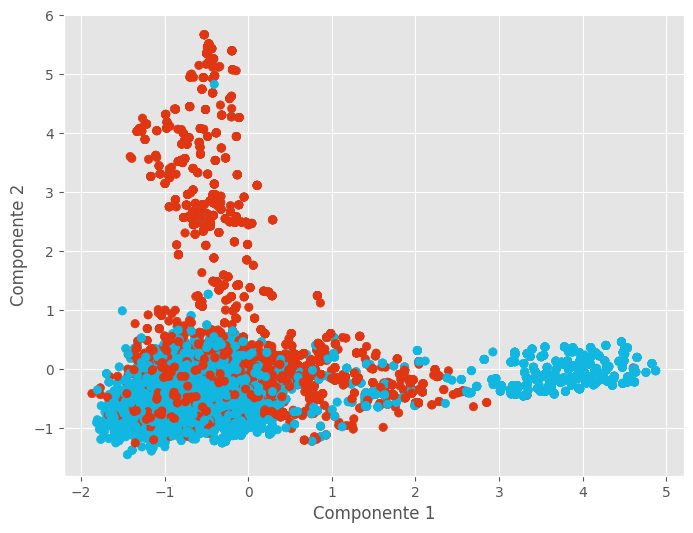

In [35]:
plt.style.use('ggplot')
plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], c = df["color"])
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.grid(True)

In [36]:
explained_variance = pca.explained_variance_ratio_
print(explained_variance*100)

[5.64287709 3.52734313]


In [37]:
pca2 = PCA(n_components=150)

In [38]:
pca2.fit(X)

PCA(n_components=150)

In [39]:
pca2.transform(X).shape

(7807, 150)

In [40]:
explained_variance = pca2.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)
print(cumulative_variance*100)

[ 5.64287709  9.17022022 11.65413381 13.85297774 15.80419735 17.4402965
 18.97224786 20.28748849 21.51554714 22.71507062 23.87410293 24.9740006
 26.06012274 26.96537205 27.846674   28.71212606 29.56238661 30.36546338
 31.15890227 31.89568185 32.61616037 33.32845815 34.01884443 34.68176933
 35.31041958 35.92596607 36.51819623 37.0959054  37.65057184 38.18823671
 38.71946453 39.23816925 39.7338803  40.22256079 40.69798088 41.17154776
 41.63660674 42.0916987  42.52604028 42.95843026 43.38290822 43.79379619
 44.2008326  44.60120913 44.98413096 45.35975604 45.72832943 46.09174127
 46.44691477 46.79298033 47.13215551 47.46912807 47.80428193 48.12990945
 48.44879655 48.76100257 49.06812451 49.36962232 49.66659628 49.96123028
 50.25190685 50.54001805 50.82511933 51.10864634 51.39018719 51.66772142
 51.93931221 52.20587911 52.46731756 52.72571319 52.98099309 53.23578782
 53.48896894 53.73642581 53.98048221 54.22271283 54.46261888 54.6996749
 54.93406265 55.16494662 55.39155107 55.61735302 55.84

# Algoritmo SVC
<hr>

In [41]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
svc = SVC(C = 100, gamma=10, kernel="rbf")

In [44]:
svc.fit(X_train, y_train)

SVC(C=100, gamma=10)

In [45]:
y_predicha = svc.predict(X_test)

In [46]:
#Calcular estadísticos
accuracy = accuracy_score(y_test, y_predicha)
recall = recall_score(y_test, y_predicha, average='weighted')
precision = precision_score(y_test, y_predicha, average='weighted')
f1 = f1_score(y_test, y_predicha, average='weighted')
print("Accuracy", round(accuracy, 3))
print("Recall", round(recall, 3))
print("precision", round(precision,3))
print("f1", round(f1,3))

Accuracy 0.818
Recall 0.818
precision 0.835
f1 0.805


In [47]:
print(accuracy)

0.8181818181818182


# Algoritmo SVC con PCA
<hr>

In [48]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

In [49]:
pipe = Pipeline([
    ('pca', PCA(n_components=150)),
    ('svc', SVC(C = 100, gamma=10, kernel="rbf", verbose=3))
])

In [50]:
pipe.fit(X_train, y_train)

[LibSVM]

Pipeline(steps=[('pca', PCA(n_components=150)),
                ('svc', SVC(C=100, gamma=10, verbose=3))])

In [51]:
y_predicha = pipe.predict(X_test)

In [52]:
#Calcular estadísticos
accuracy = accuracy_score(y_test, y_predicha)
recall = recall_score(y_test, y_predicha, average='weighted')
precision = precision_score(y_test, y_predicha, average='weighted')
f1 = f1_score(y_test, y_predicha, average='weighted')
print("Accuracy", round(accuracy, 3))
print("Recall", round(recall, 3))
print("precision", round(precision,3))
print("f1", round(f1,3))

Accuracy 0.819
Recall 0.819
precision 0.836
f1 0.805


# Algoritmo SVC con PCA y rejilla
<hr>

In [53]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

In [54]:
pipe = Pipeline([
    ('pca', PCA()),
    ('svc', SVC())
])

In [60]:
param_grid = {
    'pca__n_components': [150],  # Ejemplo de opciones para el número de componentes en PCA
    'svc__C': [100, 1000, 10000],
    'svc__gamma': [1, 0.1, 0.01],
    'svc__kernel': ['rbf', "poly"]
}

In [61]:
grid_search = GridSearchCV(estimator=pipe, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2)

In [62]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END pca__n_components=150, svc__C=100, svc__gamma=1, svc__kernel=rbf; total time=   3.7s
[CV] END pca__n_components=150, svc__C=100, svc__gamma=1, svc__kernel=rbf; total time=   3.4s
[CV] END pca__n_components=150, svc__C=100, svc__gamma=1, svc__kernel=rbf; total time=   3.2s
[CV] END pca__n_components=150, svc__C=100, svc__gamma=1, svc__kernel=rbf; total time=   2.9s
[CV] END pca__n_components=150, svc__C=100, svc__gamma=1, svc__kernel=rbf; total time=   3.0s
[CV] END pca__n_components=150, svc__C=100, svc__gamma=1, svc__kernel=poly; total time=   2.3s
[CV] END pca__n_components=150, svc__C=100, svc__gamma=1, svc__kernel=poly; total time=   2.4s
[CV] END pca__n_components=150, svc__C=100, svc__gamma=1, svc__kernel=poly; total time=   2.1s
[CV] END pca__n_components=150, svc__C=100, svc__gamma=1, svc__kernel=poly; total time=   2.2s
[CV] END pca__n_components=150, svc__C=100, svc__gamma=1, svc__kernel=poly; total time=  

GridSearchCV(cv=5, estimator=Pipeline(steps=[('pca', PCA()), ('svc', SVC())]),
             param_grid={'pca__n_components': [150],
                         'svc__C': [100, 1000, 10000],
                         'svc__gamma': [1, 0.1, 0.01],
                         'svc__kernel': ['rbf', 'poly']},
             scoring='accuracy', verbose=2)

In [63]:
grid_search.best_params_

{'pca__n_components': 150,
 'svc__C': 1000,
 'svc__gamma': 0.1,
 'svc__kernel': 'rbf'}

In [64]:
grid_search.best_score_

0.8718975180144115

In [84]:
pipe = Pipeline([
    ('pca', PCA(n_components=150)),
    ('svc', SVC(C=1000, gamma=0.1, kernel="rbf", probability=True))
])

In [85]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('pca', PCA(n_components=150)),
                ('svc', SVC(C=1000, gamma=0.1, probability=True))])

In [86]:
y_predicha = pipe.predict(X_test)

In [87]:
#Calcular estadísticos
accuracy = accuracy_score(y_test, y_predicha)
recall = recall_score(y_test, y_predicha, average='weighted')
precision = precision_score(y_test, y_predicha, average='weighted')
f1 = f1_score(y_test, y_predicha, average='weighted')
print("Accuracy", round(accuracy, 3))
print("Recall", round(recall, 3))
print("precision", round(precision,3))
print("f1", round(f1,3))

Accuracy 0.881
Recall 0.881
precision 0.881
f1 0.881


In [71]:
y_entrenamiento = pipe.predict(X_train)

In [76]:
accuracy = accuracy_score(y_train, y_entrenamiento)
recall = recall_score(y_train, y_entrenamiento, average='weighted')
precision = precision_score(y_entrenamiento, y_entrenamiento, average='weighted')
f1 = f1_score(y_train, y_entrenamiento, average='weighted')
print("Accuracy", round(accuracy, 3))
print("Recall", round(recall, 3))
print("precision", round(precision,3))
print("f1", round(f1,3))

Accuracy 0.983
Recall 0.983
precision 1.0
f1 0.983


In [77]:
df_inhibidores = pd.read_csv("Inhibidores_duales_rigurosos.csv")

In [78]:
df_inhibidores.head()

,Unnamed: 0,Molecule ChEMBL ID,Standard Value_EGFR,Standard Value_MAPK1,Standard Value_SRC,Actividad_EGFR,Actividad_MAPK1,Actividad_SRC
0,0,CHEMBL2178352,0.4,10000.0,290.0,1,0,1
1,13,CHEMBL388978,78.0,370.0,9.7,1,1,1
2,24,CHEMBL569880,11.0,10000.0,100.0,1,0,1
3,25,CHEMBL571040,24.0,10000.0,800.0,1,0,1
4,44,CHEMBL1336,50000.0,109.5,390.0,0,1,1


In [88]:
import joblib

In [89]:
joblib.dump(pipe, 'modelo_entrenado.joblib')

['modelo_entrenado.joblib']

In [90]:
df.to_csv("ECFP_calculado.csv", index=False)